# Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

In [2]:
# Twitter enhanced archive. Local file
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Image prediction data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [20]:
# Retweet and favorites data - API Set up
consumer_key = 'N/A'
consumer_secret = 'N/A'
access_token = 'N/A-HRuCROZztjPA6jPPiuygo5SVZPtvtm'
access_secret = 'N/A'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
# Now get tweet data for every tweet in dog archive, writing each to txt file
outfile = open('tweet_json.txt', 'w')
for tweet_id in twitter_archive_df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_json = tweet._json
        json.dump(tweet_json, outfile)
        outfile.write('\n')
    except:
        continue
outfile.close()

Rate limit reached. Sleeping for: 777
Rate limit reached. Sleeping for: 780


In [4]:
# Read JSON data line by line, forming a list of dictionaries
df_list = []

with open('tweet_json.txt') as infile:
    for line in infile:
        df_list.append(json.loads(line))

tweet_data_extra_df = pd.DataFrame(df_list, columns = df_list[0].keys())

# Assess

## Visual

In [5]:
# Twitter enhanced arhive
twitter_archive_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1927,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She knits. Specializes in tobogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556...,10,10,Lucy,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wafer. He represents every fiber of my be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210...,13,10,Wafer,None,None,None,None
1143,727314416056803329,NaN,NaN,2016-05-03 01:50:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper was about to explain where that di...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727314416...,11,10,None,None,None,pupper,None
476,816014286006976512,NaN,NaN,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None
834,768473857036525572,NaN,NaN,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chevy. He had a late breakfast and now ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,None,None,None,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
664,790723298204217344,NaN,NaN,2016-10-25 01:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Happy. He's a bathtub r...,7.899865e+17,4.196984e+09,2016-10-23 00:27:05 +0000,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None


In [6]:
# Image prediction data
image_predictions_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True
1082,718454725339934721,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,hammer,0.169865,False,hatchet,0.115744,False,chime,0.068092,False
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True


In [7]:
# Additional tweet data from Twitter API
tweet_data_extra_df.sample(15)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
1418,Wed Feb 10 18:11:03 +0000 2016,697482927769255936,697482927769255936,Meet Blipson. He's a Doowap Hufflepuff. That U...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697482920076951552, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,738,2578,False,False,False,False,en
189,Fri Apr 21 02:22:29 +0000 2017,855245323840757760,855245323840757760,RT @dog_rates: Meet George. He looks slightly ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6282,0,False,False,NaN,NaN,en
2213,Sun Nov 22 03:24:58 +0000 2015,668268907921326080,668268907921326080,Here we have an Azerbaijani Buttermilk named G...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668268894449078272, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,246,570,False,False,False,False,en
1006,Sat Jun 25 17:31:25 +0000 2016,746757706116112384,746757706116112384,This is Maddie. She gets some wicked air time....,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,None,None,False,4243,10194,False,False,False,False,en
830,Fri Aug 19 19:14:16 +0000 2016,766714921925144576,766714921925144576,His name is Charley and he already has a new s...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.667118e+17,...,None,None,False,424,2798,False,False,NaN,NaN,en
892,Wed Jul 27 00:40:12 +0000 2016,758099635764359168,758099635764359168,In case you haven't seen the most dramatic sne...,False,"[0, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,None,None,False,11073,20611,False,False,False,False,en
376,Wed Feb 01 17:44:55 +0000 2017,826848821049180160,826848821049180160,This is Cupid. He was found in the trash. Now ...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 826848814229237760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,11315,39106,False,False,False,False,en
1898,Wed Dec 09 01:07:00 +0000 2015,674394782723014656,674394782723014656,This is Gary. He's a hide and seek champion. S...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674394776565891077, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,608,1555,False,False,False,False,en
1063,Sun Jun 05 19:47:03 +0000 2016,739544079319588864,739544079319588864,This... is a Tyrannosaurus rex. We only rate d...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 739544071010713604, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,23293,42208,False,False,False,False,en
1929,Mon Dec 07 03:45:53 +0000 2015,673709992831262724,673709992831262724,I know a lot of you are studying for finals. G...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673709986195890176, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,288,875,False,False,False,False,en


## Programmatic

In [8]:
# Twitter enhanced arhive
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# How can the denominator be more than 10?
twitter_archive_df.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [11]:
# Image prediction data
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
# How can there be 100% confidence?
image_predictions_df.query("p1_conf == 1.0")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [14]:
image_predictions_df.shape

(2075, 12)

In [15]:
# Additional tweet data from Twitter API
tweet_data_extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 27 columns):
created_at                       2342 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
full_text                        2342 non-null object
truncated                        2342 non-null bool
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
source                           2342 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2342 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [16]:
tweet_data_extra_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
count,2.342000e+03,7.800000e+01,7.800000e+01,2342.000000,2342.000000
mean,7.422646e+17,7.455079e+17,2.014171e+16,2981.989752,8040.369769
std,6.837466e+16,7.582492e+16,1.252797e+17,4964.054250,12272.430398
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.783509e+17,6.757419e+17,3.086374e+08,600.000000,1395.250000
50%,7.186224e+17,7.038708e+17,4.196984e+09,1396.000000,3513.500000
75%,7.987010e+17,8.257804e+17,4.196984e+09,3480.500000,9890.750000
max,8.924206e+17,8.862664e+17,8.405479e+17,79735.000000,142522.000000


In [17]:
# Why are these all false even though we clearly have favorited and retweeted counts?
print(tweet_data_extra_df.favorited.value_counts())
print(tweet_data_extra_df.retweeted.value_counts())

False    2342
Name: favorited, dtype: int64
False    2342
Name: retweeted, dtype: int64


# Clean

In [18]:
# First copy all dataframes
twitter_archive_df_copy = twitter_archive_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
tweet_data_extra_df_copy = tweet_data_extra_df.copy()

### Quality

##### Define
Remove all retweets and replies from both `twitter-archive-enhanced` and `tweet_data_extra` tables.

##### Code

In [19]:
# Twitter archive enhanced table
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.in_reply_to_status_id.isnull()]
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.in_reply_to_user_id.isnull()]
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.retweeted_status_id.isnull()]
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.retweeted_status_user_id.isnull()]

In [20]:
# Tweet data extra table
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.in_reply_to_status_id.isnull()]
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.in_reply_to_user_id.isnull()]
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.in_reply_to_screen_name.isnull()]

##### Test

In [21]:
twitter_archive_df_copy.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [22]:
twitter_archive_df_copy.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [23]:
twitter_archive_df_copy.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [24]:
twitter_archive_df_copy.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [25]:
tweet_data_extra_df_copy.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [26]:
tweet_data_extra_df_copy.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [27]:
tweet_data_extra_df_copy.in_reply_to_screen_name.value_counts()

Series([], Name: in_reply_to_screen_name, dtype: int64)

##### Define
Fix "retweeted" and "favorited" columns in `tweet_data_extra` table to say True when they are retweeted or favorited.

##### Code

In [28]:
# Mapping functions
def fix_favorites(row):
    if row.favorite_count > 0:
        return True
    else:
        return False
    
def fix_retweets(row):
    if row.retweet_count > 0:
        return True
    else:
        return False

In [29]:
# Apply
tweet_data_extra_df_copy.favorited = tweet_data_extra_df_copy.apply(fix_favorites, axis=1)
tweet_data_extra_df_copy.retweeted = tweet_data_extra_df_copy.apply(fix_retweets, axis=1)

##### Test

In [30]:
tweet_data_extra_df_copy.favorited .value_counts()

True     2096
False     168
Name: favorited, dtype: int64

In [31]:
tweet_data_extra_df_copy.retweeted .value_counts()

True    2264
Name: retweeted, dtype: int64

In [32]:
tweet_data_extra_df_copy.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6649,0,False,True,NaN,NaN,en
2091,Sat Nov 28 05:28:09 +0000 2015,670474236058800128,670474236058800128,Honor to rate this dog. Great teeth. Nice horn...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670474230501363712, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,800,1579,True,True,False,False,en
765,Wed Sep 14 23:30:38 +0000 2016,776201521193218049,776201521193218049,This is O'Malley. That is how he sleeps. Doesn...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776201512041189376, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2797,10357,True,True,False,False,en
783,Wed Sep 07 01:47:12 +0000 2016,773336787167145985,773336787167145985,RT @dog_rates: Meet Fizz. She thinks love is a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,5648,0,False,True,NaN,NaN,en
502,Thu Dec 22 17:23:53 +0000 2016,811985624773361665,811985624773361665,Say hello to Ted. He accidentally opened the f...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 811985615826714624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1567,7856,True,True,False,False,en


In [33]:
tweet_data_extra_df_copy.query("favorited == False")

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,True,104,0,False,True,False,False,und
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,18532,0,False,True,False,False,en
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6833,0,False,True,NaN,NaN,en
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1292,0,False,True,NaN,NaN,en
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6649,0,False,True,NaN,NaN,en
77,Wed Jun 21 19:36:23 +0000 2017,877611172832227328,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,81,0,False,True,False,False,en
90,Tue Jun 13 01:14:41 +0000 2017,874434818259525634,874434818259525634,RT @dog_rates: This is Coco. At first I though...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,14805,0,False,True,NaN,NaN,en
95,Sat Jun 10 00:35:19 +0000 2017,873337748698140672,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1594,0,False,True,NaN,NaN,en
99,Thu Jun 08 04:17:07 +0000 2017,872668790621863937,872668790621863937,RT @loganamnosis: Penelope here is doing me qu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,28,0,False,True,NaN,NaN,en
107,Sun Jun 04 00:46:17 +0000 2017,871166179821445120,871166179821445120,RT @dog_rates: This is Dawn. She's just checki...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,5752,0,False,True,NaN,NaN,en


##### Define
In the `twitter-archive-enhanced` table, for dogs whose names were incorrectly extracted from sentences, replace these names with "None". It is better to have None than an inaccurate name.

##### Code

In [34]:
# Double check that names that start with a lowercase letter are incorrecly extracted names from sentences
twitter_archive_df_copy[twitter_archive_df_copy.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [35]:
# Mapping function
def fix_dog_names(row):
    if row["name"][0].islower():
        return "None"
    else:
        return row["name"]

In [36]:
# Apply
twitter_archive_df_copy.name = twitter_archive_df_copy.apply(fix_dog_names, axis=1)

##### Test

In [37]:
twitter_archive_df_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,None,None,None,None
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
1746,679132435750195208,NaN,NaN,2015-12-22 02:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a river dancer. His friend...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679132435...,10,10,Louis,None,None,None,None
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
1530,690021994562220032,NaN,NaN,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Geoff (pronounced ""Kyle""). He acc...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690021994...,10,10,Geoff,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None
370,828409743546925057,NaN,NaN,2017-02-06 01:07:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mutt Ryan. He's quite confident at the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828409743...,12,10,Mutt,None,None,None,None
467,817120970343411712,NaN,NaN,2017-01-05 21:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817120970...,13,10,None,None,None,None,None


In [38]:
# No more entries where the name is lower case
twitter_archive_df_copy[twitter_archive_df_copy.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define
For every denominator that is a multiple of 10, it just means that there are multiple dogs in the picture, so let's normalize each of those ratings as if it was one dog being rated.

##### Code

In [39]:
# Map function
def fix_multiple_dogs_numerator(row):
    # if denominator is a higher multiple of 10
    if (row["rating_denominator"] > 10 and row["rating_denominator"] % 10 == 0):
        multiple = row["rating_denominator"] / 10
        return int(round(row["rating_numerator"] / multiple))
    else:
        return row["rating_numerator"]

In [40]:
# Apply
twitter_archive_df_copy["rating_numerator"] = twitter_archive_df_copy.apply(fix_multiple_dogs_numerator, axis=1)

##### Test

In [41]:
twitter_archive_df.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [42]:
twitter_archive_df_copy.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,12,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,11,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,12,170,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,2,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,10,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,11,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,10,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,9,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,12,50,None,None,None,None,None


##### Define
Now that those numerators are fixed, let's fix those same denominators by normalizing them, too.

##### Code

In [43]:
# Map function
def fix_multiple_dogs_denominator(row):
    # if denominator is a higher multiple of 10
    if (row["rating_denominator"] > 10 and row["rating_denominator"] % 10 == 0):
        return 10
    else:
        return row["rating_denominator"]

In [44]:
# Apply
twitter_archive_df_copy["rating_denominator"] = twitter_archive_df_copy.apply(fix_multiple_dogs_denominator, axis=1)

##### Test

In [45]:
twitter_archive_df_copy.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


##### Define
Let's fix the two broken ratings displayed in the test above. I simply visited the webpages of the two tweets and found their true ratings, which were incorrectly extracted.

##### Code

In [46]:
twitter_archive_df_copy.at[1068, 'rating_numerator'] = 14
twitter_archive_df_copy.at[1068, 'rating_denominator'] = 10

twitter_archive_df_copy.at[1662, 'rating_numerator'] = 10
twitter_archive_df_copy.at[1662, 'rating_denominator'] = 10

##### Test

In [47]:
twitter_archive_df_copy.loc[[1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


In [48]:
twitter_archive_df_copy.loc[[1662]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None


##### Define
Remove the tweet from all three tables where the image prediction has a confidence of 100%. This is simply unfeasible; the prediction isn't even a dog.

##### Code

In [49]:
image_predictions_df_copy.query("p1_conf == 1.0")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [50]:
image_predictions_df_copy = image_predictions_df_copy[image_predictions_df_copy.tweet_id != 667866724293877760]

In [51]:
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.tweet_id != 667866724293877760]

In [52]:
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.id != 667866724293877760]

##### Test

In [53]:
image_predictions_df_copy.query("p1_conf == 1.0")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [54]:
twitter_archive_df_copy.query("tweet_id == 667866724293877760")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [55]:
tweet_data_extra_df_copy.query("id == 667866724293877760")

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang


##### Define
In the `twitter-archive-enhanced` table, change the data type of the timestamp variable to be a datetime object, as opposed to a string.

##### Code

In [56]:
# Mapping function
def fix_timestamps(row):
    return row["timestamp"][:-15]

In [57]:
# Apply
twitter_archive_df_copy["timestamp"] = twitter_archive_df_copy.apply(fix_timestamps, axis=1)

# To datetime
twitter_archive_df_copy.timestamp = pd.to_datetime(twitter_archive_df_copy.timestamp)

##### Test

In [58]:
# Check dtype
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2096 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null int64
rating_denominator            2096 non-null int64
name                          2096 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
dtypes: datetime64[ns](1), float

In [59]:
# Check some values
twitter_archive_df_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1903,674638615994089473,NaN,NaN,2015-12-09,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is fed up with being tickled. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674638615...,12,10,None,None,None,pupper,None
1223,714251586676113411,NaN,NaN,2016-03-28,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,None,None,None,None
1601,686003207160610816,NaN,NaN,2016-01-10,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,None,None,None,None
1572,687664829264453632,NaN,NaN,2016-01-14,"<a href=""http://twitter.com/download/iphone"" r...",Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687664829...,11,10,Opal,None,None,None,None
2200,668655139528511488,NaN,NaN,2015-11-23,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None
556,803638050916102144,NaN,NaN,2016-11-29,"<a href=""http://twitter.com/download/iphone"" r...",Pupper hath acquire enemy. 13/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803638050...,13,10,None,None,None,pupper,None
874,761292947749015552,NaN,NaN,2016-08-04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,None,None,None,None
1820,676588346097852417,NaN,NaN,2015-12-15,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,None,None,None,pupper,None
1908,674436901579923456,NaN,NaN,2015-12-09,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bailey. She plays with her food. Very chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674436901...,9,10,Bailey,None,None,None,None


### Tidiness

##### Define
Turn the three dog stage columns into just one column. As explained in the report, melting is a hassle here so I will simply add a column.

In [60]:
# Map function
def fix_dog_stages(row):
    if (row["doggo"] != 'None'):
        return "doggo"
    elif (row["floofer"] != 'None'):
        return "floofer"
    elif (row["pupper"] != 'None'):
        return "pupper"
    elif (row["puppo"] != 'None'):
        return "puppo"
    else:
         return 'None'

In [61]:
# Apply
twitter_archive_df_copy["dog_stage"] = twitter_archive_df_copy.apply(fix_dog_stages, axis=1)

##### Test

In [62]:
twitter_archive_df_copy.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1795,677314812125323265,NaN,NaN,2015-12-17,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,None,None,None,None,None
2234,668190681446379520,NaN,NaN,2015-11-21,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,None,None,None,None,None
358,830097400375152640,NaN,NaN,2017-02-10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None,None
181,857029823797047296,NaN,NaN,2017-04-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He performs group cheeky wink tu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857029823...,12,10,Zeke,None,None,None,None,None
1897,674737130913071104,NaN,NaN,2015-12-09,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674737130...,10,10,Rufio,None,None,pupper,None,pupper
1567,687826841265172480,NaN,NaN,2016-01-15,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,None,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None,None
1674,682259524040966145,NaN,NaN,2015-12-30,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524...,9,10,Jax,None,None,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None,None
1794,677328882937298944,NaN,NaN,2015-12-17,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. All the dogs adore Derek. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677328882...,10,10,Derek,None,None,None,None,None


##### Define
From the `tweet_data_extra` table, remove unnecessary columns that provide no value for this report or the analysis.

##### Code

In [63]:
tweet_data_extra_df_copy.drop(columns=['id_str', 'display_text_range', 'entities', 'extended_entities', 'possibly_sensitive_appealable', 'lang'], inplace=True)

##### Test

In [64]:
# Original columns
tweet_data_extra_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [65]:
# Remaining columns
tweet_data_extra_df_copy.columns

Index(['created_at', 'id', 'full_text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive'],
      dtype='object')

# Combine & Store Cleaned Data

In [66]:
# First merge
cleaned_twitter_data = twitter_archive_df_copy.merge(tweet_data_extra_df_copy, how='inner', left_on='tweet_id', right_on='id')

In [67]:
cleaned_twitter_data.shape

(2095, 39)

In [68]:
# Second merge
cleaned_twitter_data = cleaned_twitter_data.merge(image_predictions_df_copy, how='inner', on='tweet_id')

In [72]:
# Remove redundant id column
cleaned_twitter_data.drop(columns=['id'])

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [73]:
# Check columns
cleaned_twitter_data.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'created_at', 'id',
       'full_text', 'truncated', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [75]:
# Check shape
cleaned_twitter_data.shape

(1969, 50)

In [76]:
# Check info
cleaned_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 50 columns):
tweet_id                      1969 non-null int64
in_reply_to_status_id_x       0 non-null float64
in_reply_to_user_id_x         0 non-null float64
timestamp                     1969 non-null datetime64[ns]
source_x                      1969 non-null object
text                          1969 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1969 non-null object
rating_numerator              1969 non-null int64
rating_denominator            1969 non-null int64
name                          1969 non-null object
doggo                         1969 non-null object
floofer                       1969 non-null object
pupper                        1969 non-null object
puppo                         1969 non-null object
dog_stage                     19

In [77]:
# Completely null data
cleaned_twitter_data[cleaned_twitter_data.tweet_id.isnull()]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [78]:
# Clean out null data
cleaned_twitter_data = cleaned_twitter_data[cleaned_twitter_data.tweet_id.notnull()]

In [79]:
# Check shape and info again
cleaned_twitter_data.shape

(1969, 50)

In [80]:
cleaned_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 50 columns):
tweet_id                      1969 non-null int64
in_reply_to_status_id_x       0 non-null float64
in_reply_to_user_id_x         0 non-null float64
timestamp                     1969 non-null datetime64[ns]
source_x                      1969 non-null object
text                          1969 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1969 non-null object
rating_numerator              1969 non-null int64
rating_denominator            1969 non-null int64
name                          1969 non-null object
doggo                         1969 non-null object
floofer                       1969 non-null object
pupper                        1969 non-null object
puppo                         1969 non-null object
dog_stage                     19

In [81]:
# Finally, save cleaned master dataset to a CSV file
cleaned_twitter_data.to_csv('twitter_archive_master.csv')

# Analysis and Visualization

In [82]:
# import necessary viz libs
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style('darkgrid')

In [83]:
# import clean dataa
twitter_data_master = pd.read_csv('twitter_archive_master.csv')

In [84]:
# Get rid of erroneous column
twitter_data_master.drop(columns=['Unnamed: 0'], inplace=True)

### Insight 1

In [85]:
# Which dog stage was most correctly identified as a dog by the image prediction?
twitter_data_master.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'created_at', 'id',
       'full_text', 'truncated', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [86]:
# Filter data
twitter_data_filtered = twitter_data_master.query("p1_dog == True")
twitter_data_filtered = twitter_data_filtered.query("dog_stage != 'None'")

In [89]:
twitter_data_filtered.dog_stage.value_counts()

pupper     144
doggo       57
puppo       19
floofer      7
Name: dog_stage, dtype: int64

In [90]:
# Let's check the original proportions of dog stages, whether correctly identified as a dog or not
twitter_data_master.dog_stage.value_counts()

None       1666
pupper      201
doggo        73
puppo        22
floofer       7
Name: dog_stage, dtype: int64

### Insight 2

In [91]:
# Does rating correlate with favorites?
twitter_data_master['favorite_count'].corr(twitter_data_master['rating_numerator'])

0.022282051017944247

In [92]:
# Does rating correlate with retweets?
twitter_data_master['retweet_count'].corr(twitter_data_master['rating_numerator'])

0.023224433548445233

### Insight 3

In [93]:
# Filter data
twitter_data_filtered = twitter_data_master.query("dog_stage != 'None'")

In [94]:
# What is the average favorite count by dog stage?
twitter_data_filtered.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo      19496.452055
floofer    12830.000000
pupper      7140.512438
puppo      22074.045455
Name: favorite_count, dtype: float64

In [95]:
# What is the average retweet count by dog stage?
twitter_data_filtered.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo      6894.712329
floofer    4765.000000
pupper     2308.427861
puppo      6401.454545
Name: retweet_count, dtype: float64

### Visualization

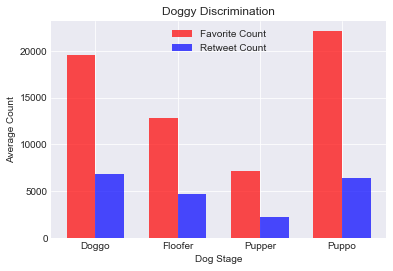

In [96]:
# Visualizing my favorite insight - Doggy Discrimination
# matplotlib docs on grouped bar chart: https://matplotlib.org/gallery/units/bar_unit_demo.html

# figure set up
N = 4
fig, ax = plt.subplots()
ind = np.arange(N)       # the x locations for the groups
width = 0.35             # the width of the bars

# get data
favorite_data = twitter_data_filtered.groupby('dog_stage')['favorite_count'].mean()
retweet_data = twitter_data_filtered.groupby('dog_stage')['retweet_count'].mean()

# create plot objects
p1 = ax.bar(ind, favorite_data, width, color='r', alpha=0.7)
p2 = ax.bar(ind + width, retweet_data, width, color='b', alpha=0.7)

# configure plot with clean labeling
ax.set_title('Doggy Discrimination')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Doggo', 'Floofer', 'Pupper', 'Puppo'))

ax.legend((p1[0], p2[0]), ('Favorite Count', 'Retweet Count'))
ax.autoscale_view()
ax.set_ylabel("Average Count")
ax.set_xlabel("Dog Stage")

plt.show()